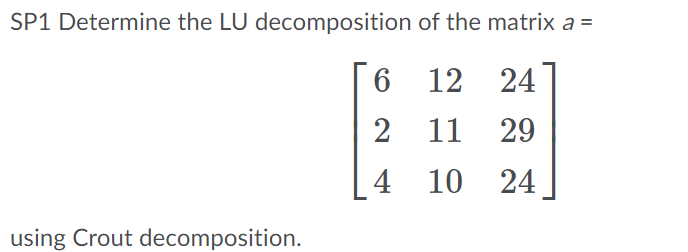

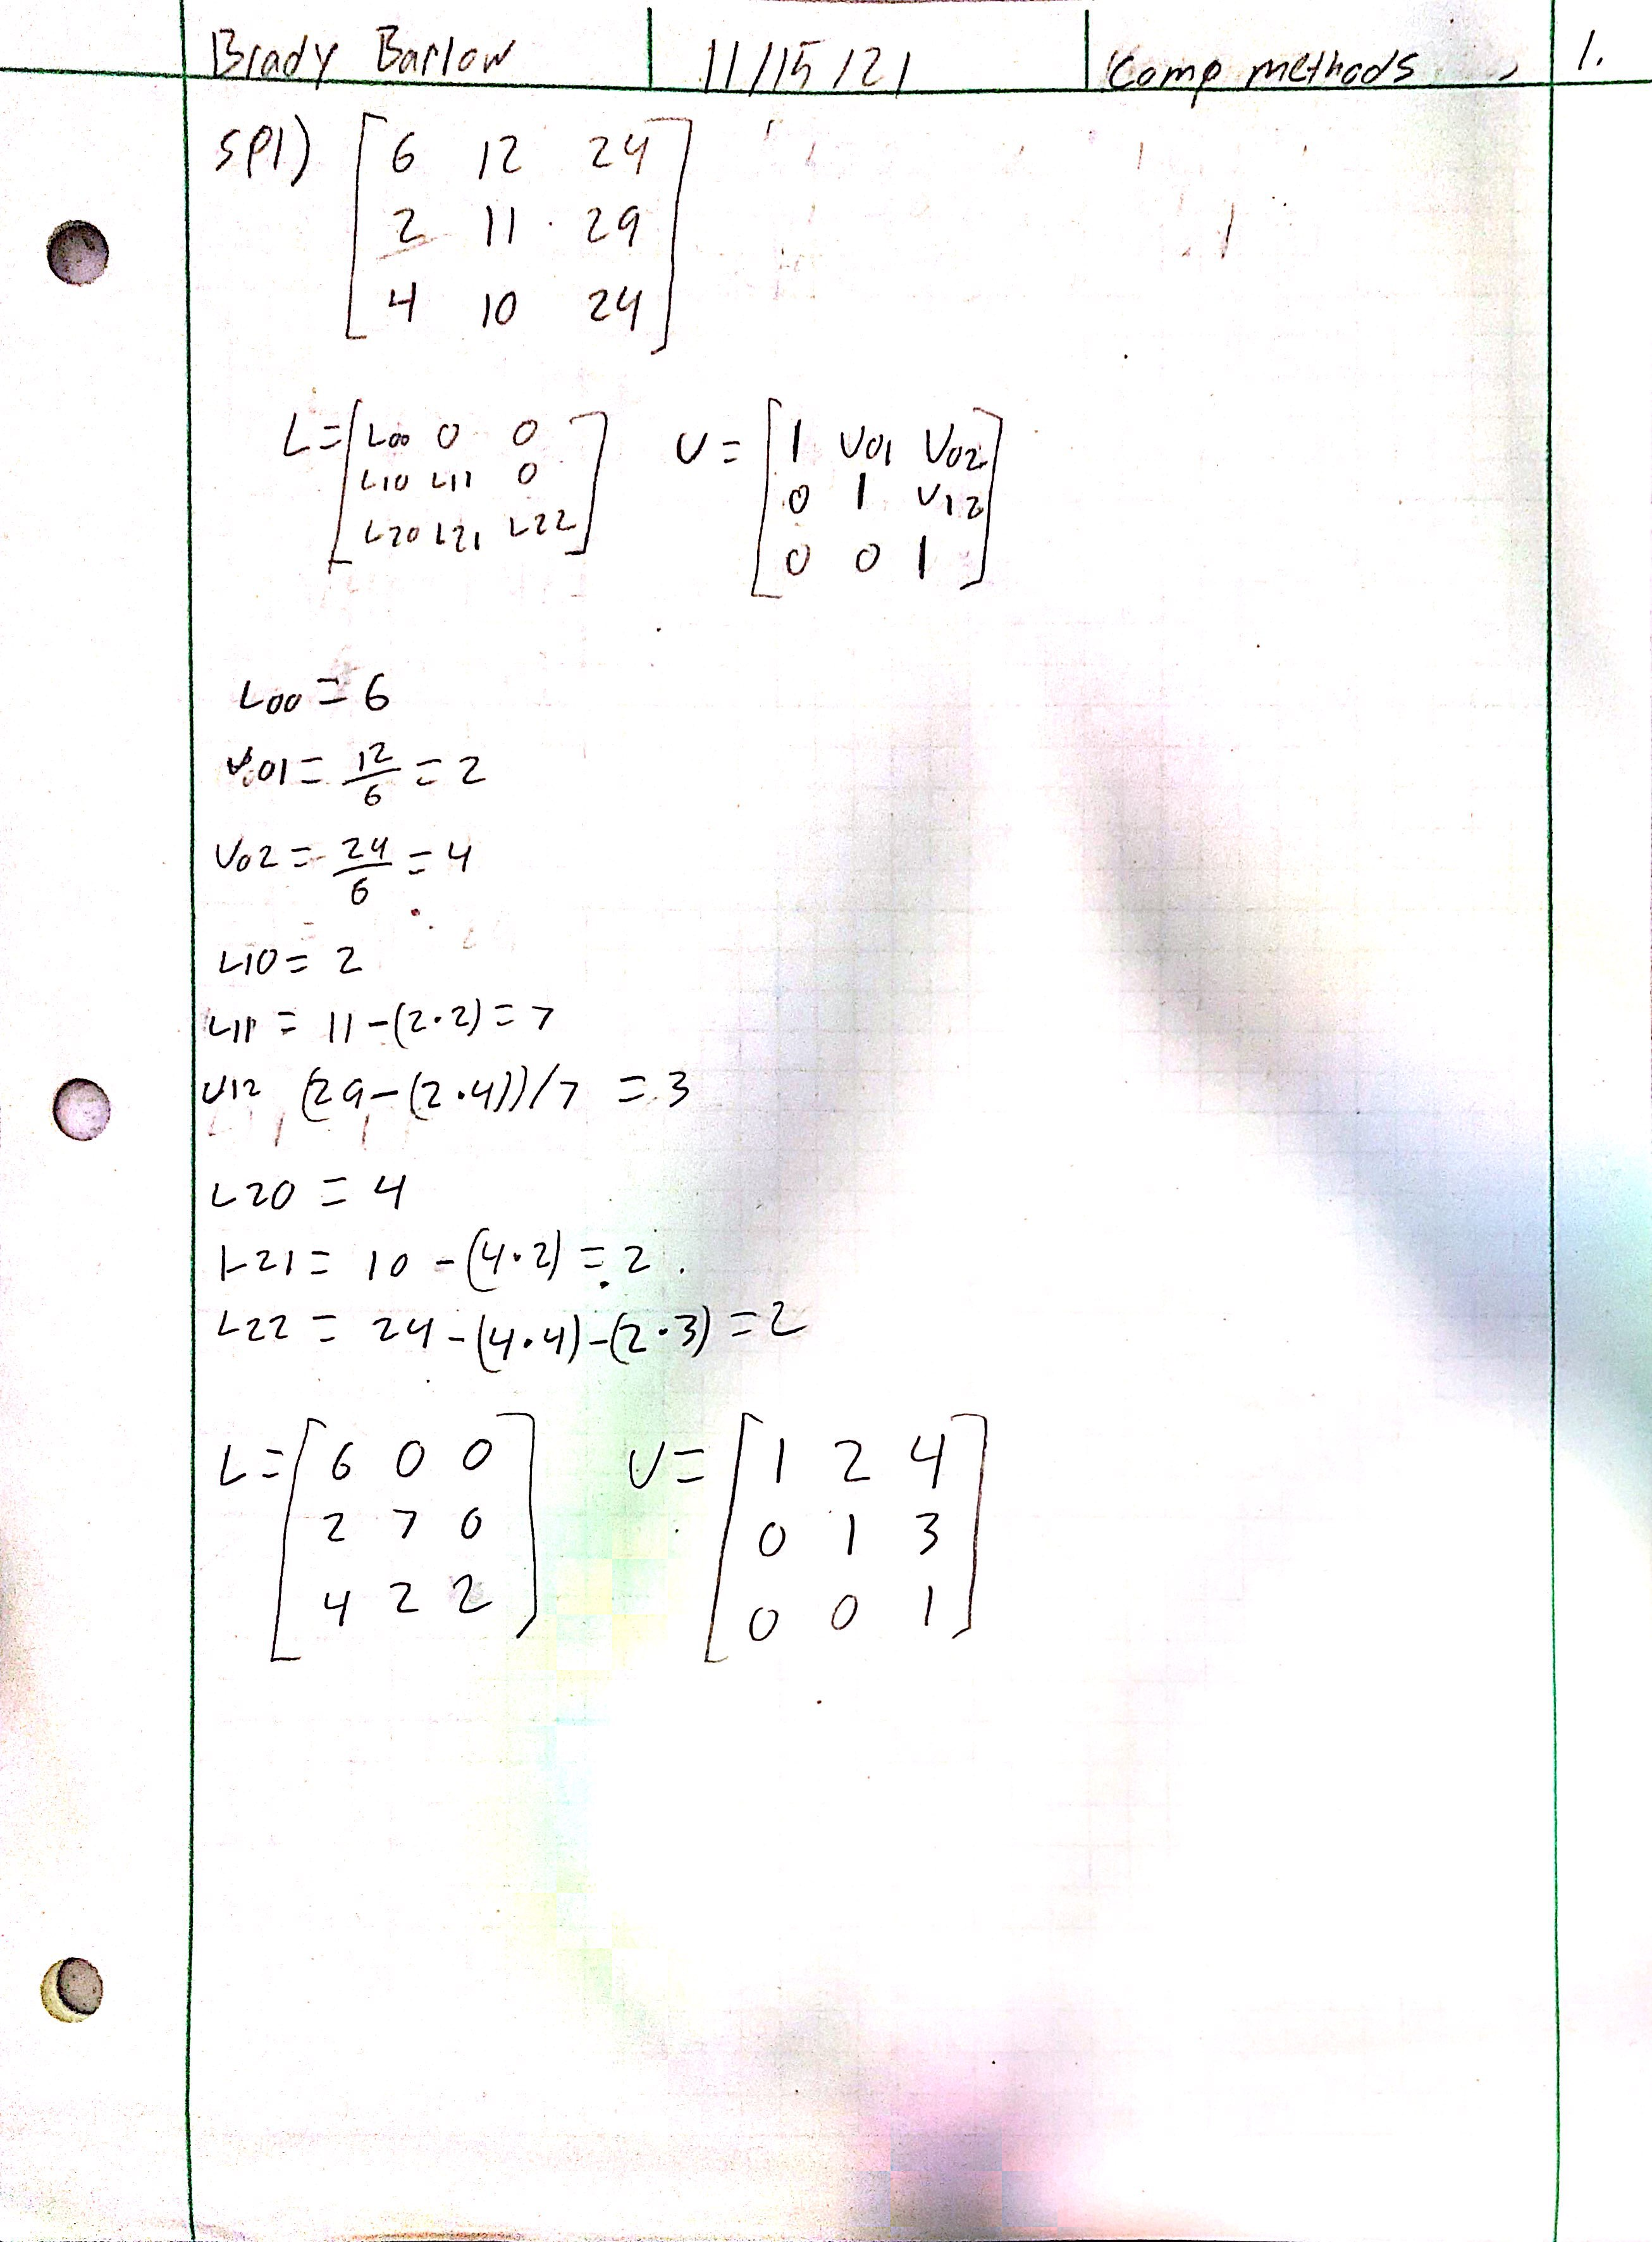

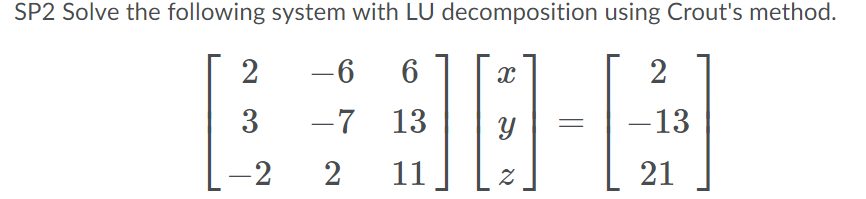

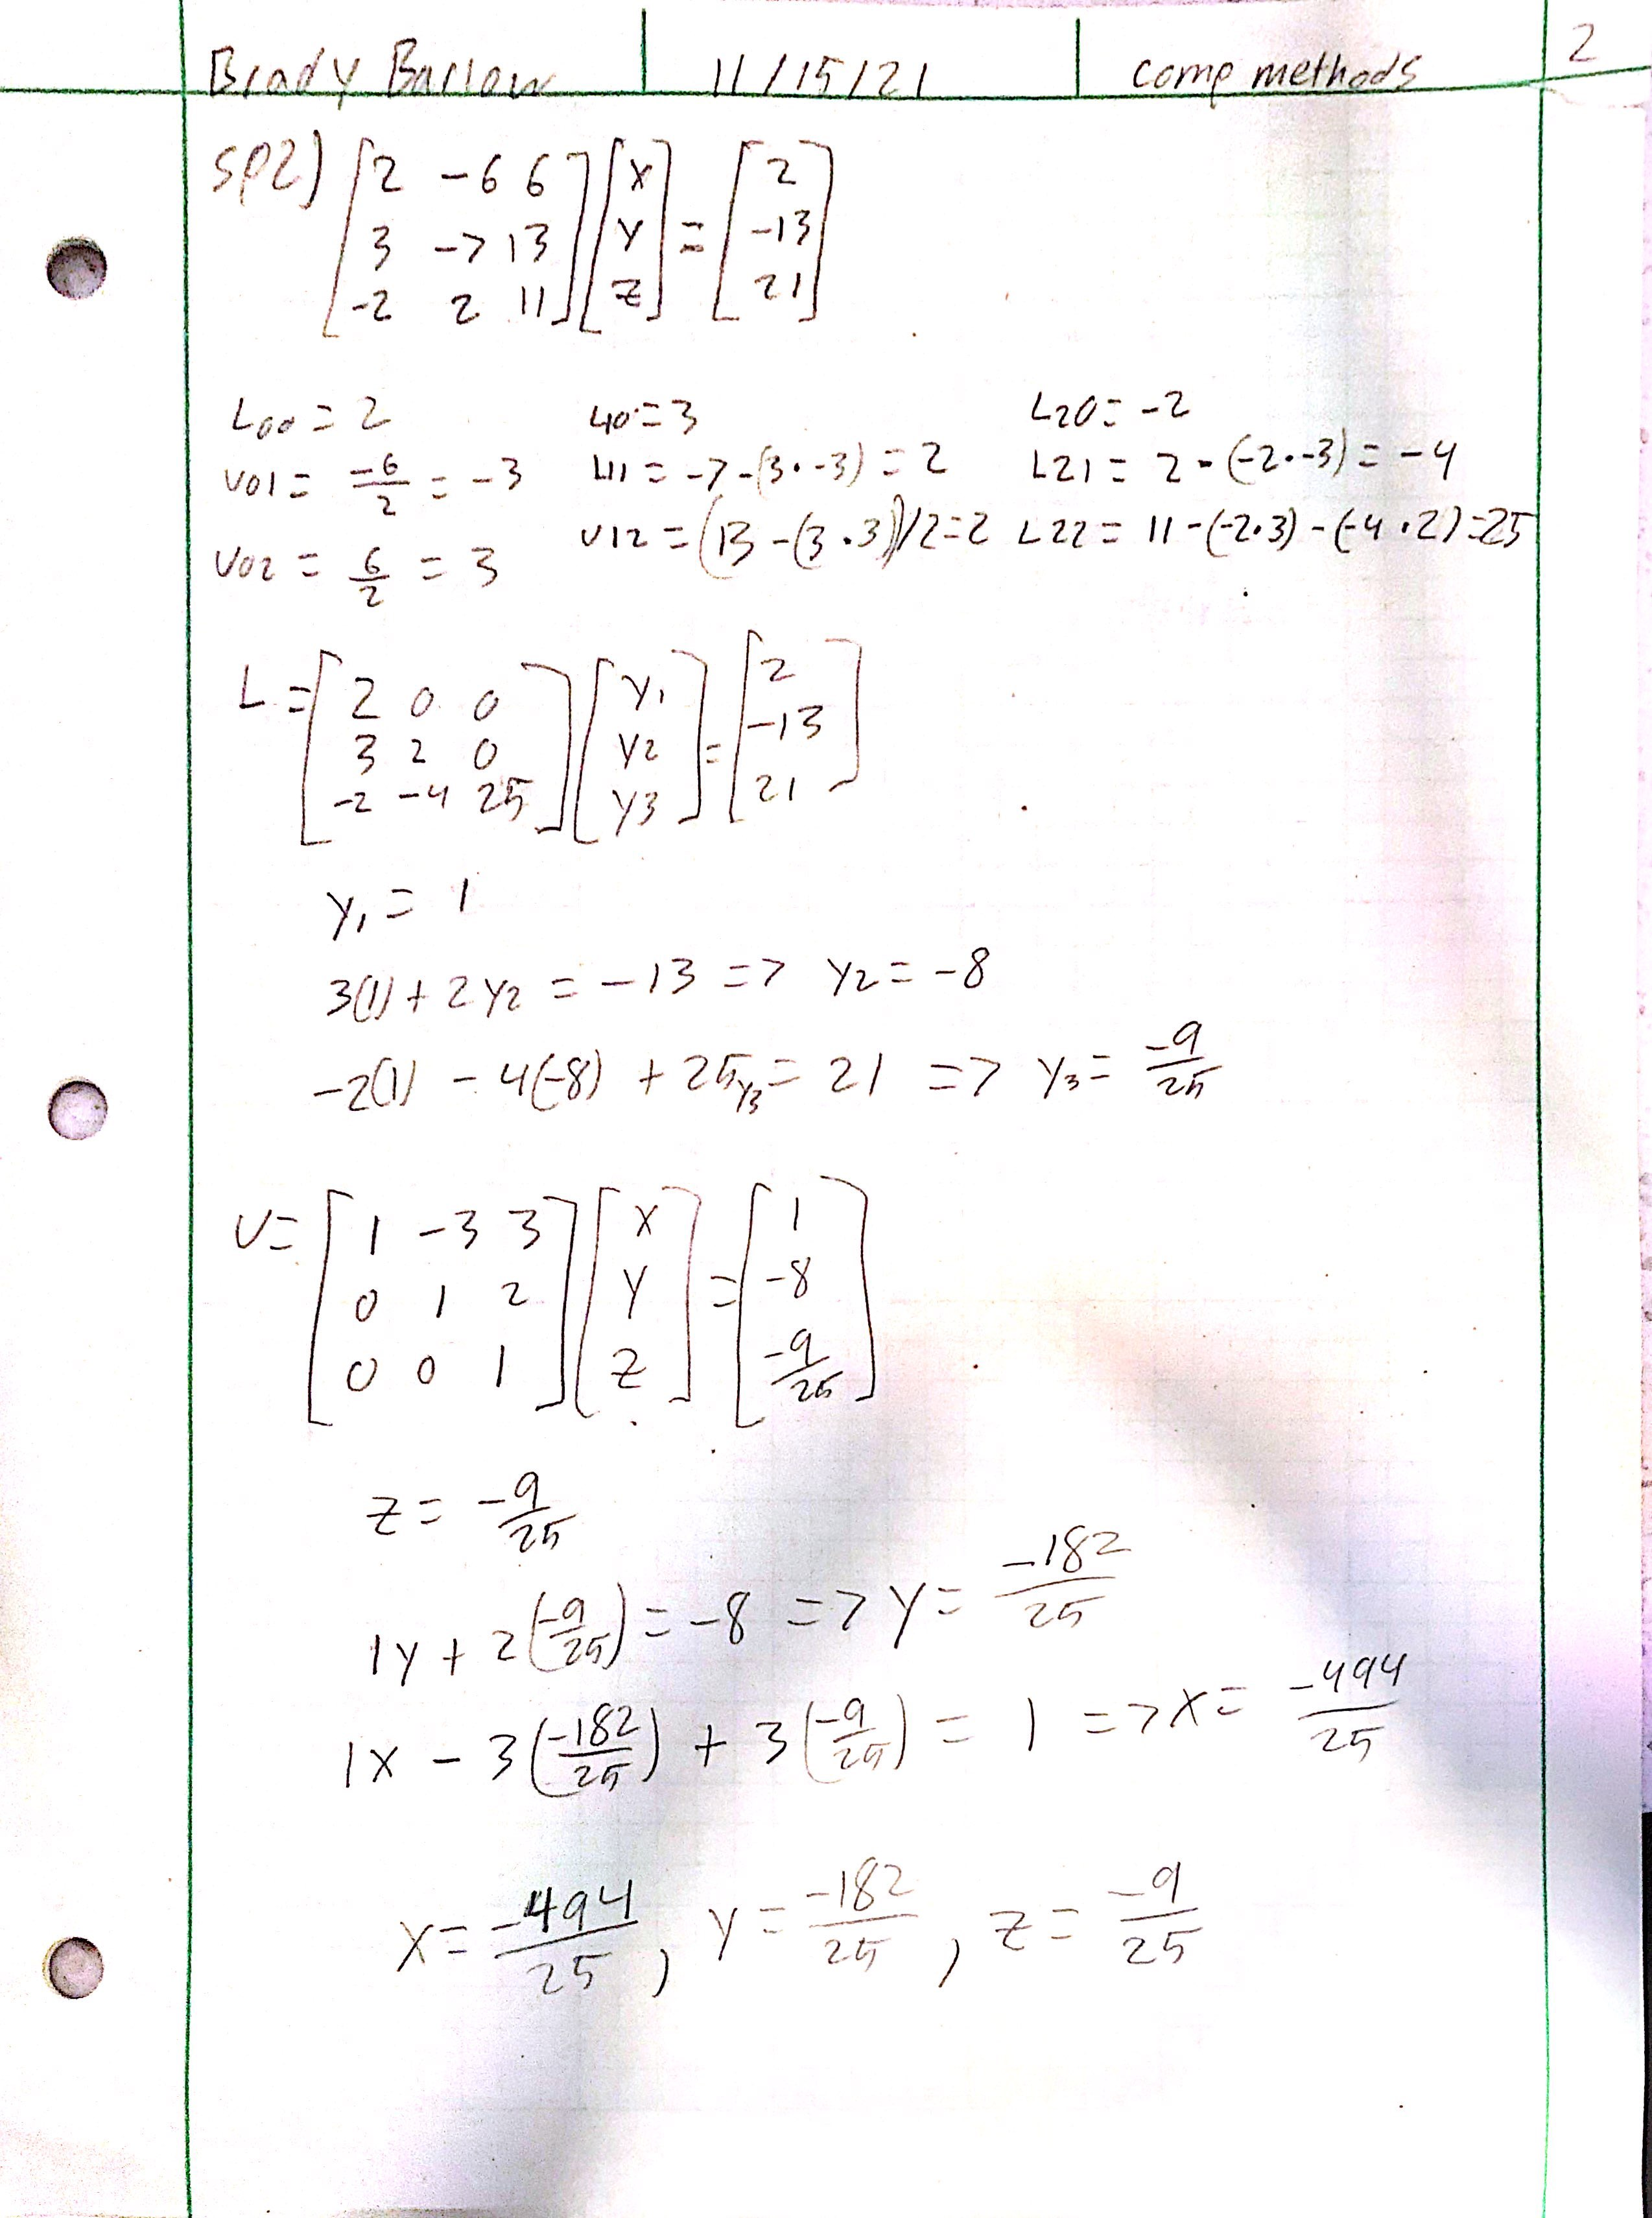

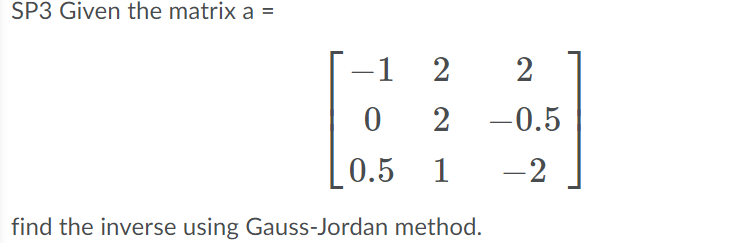

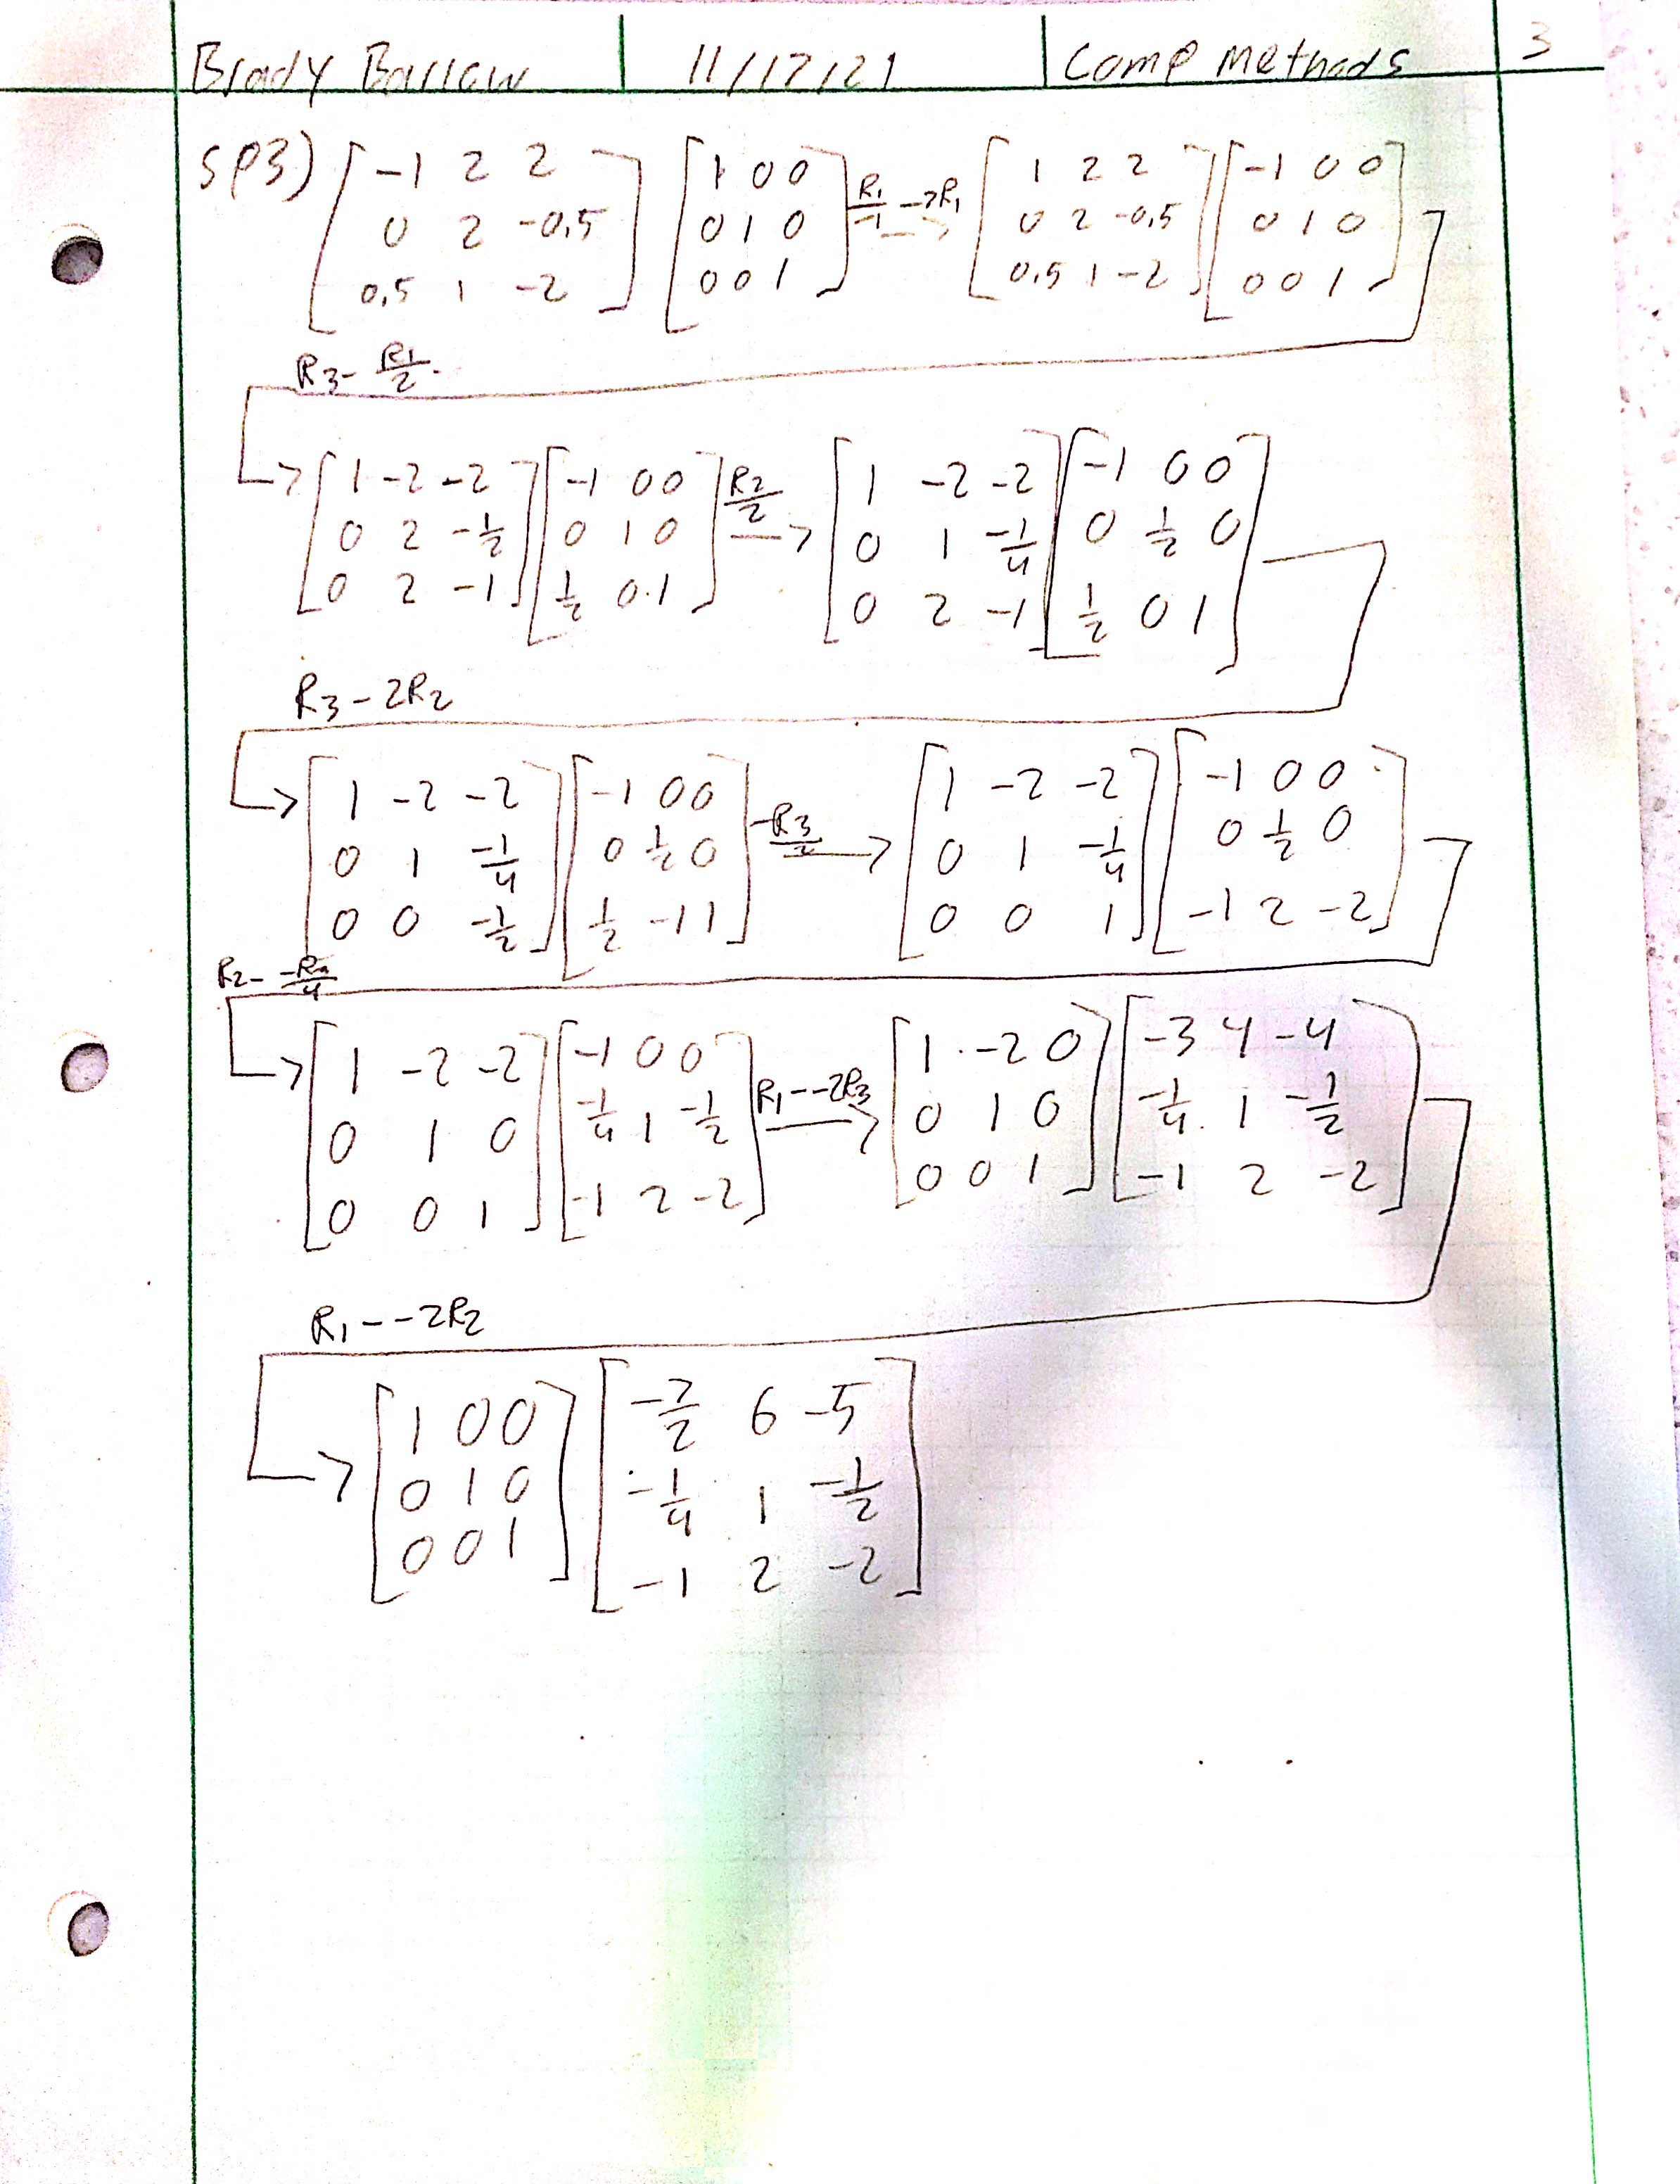

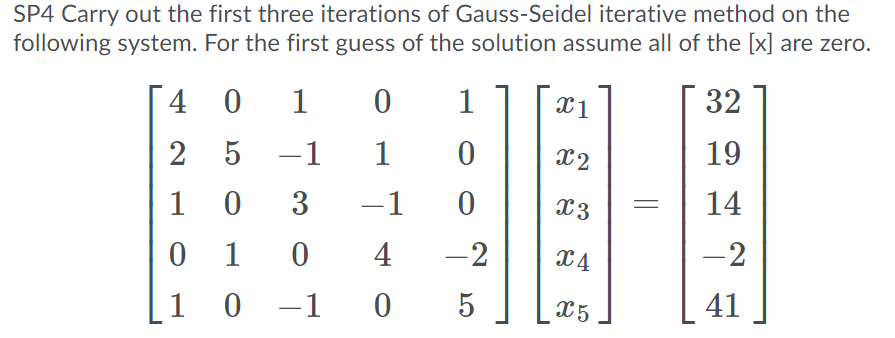

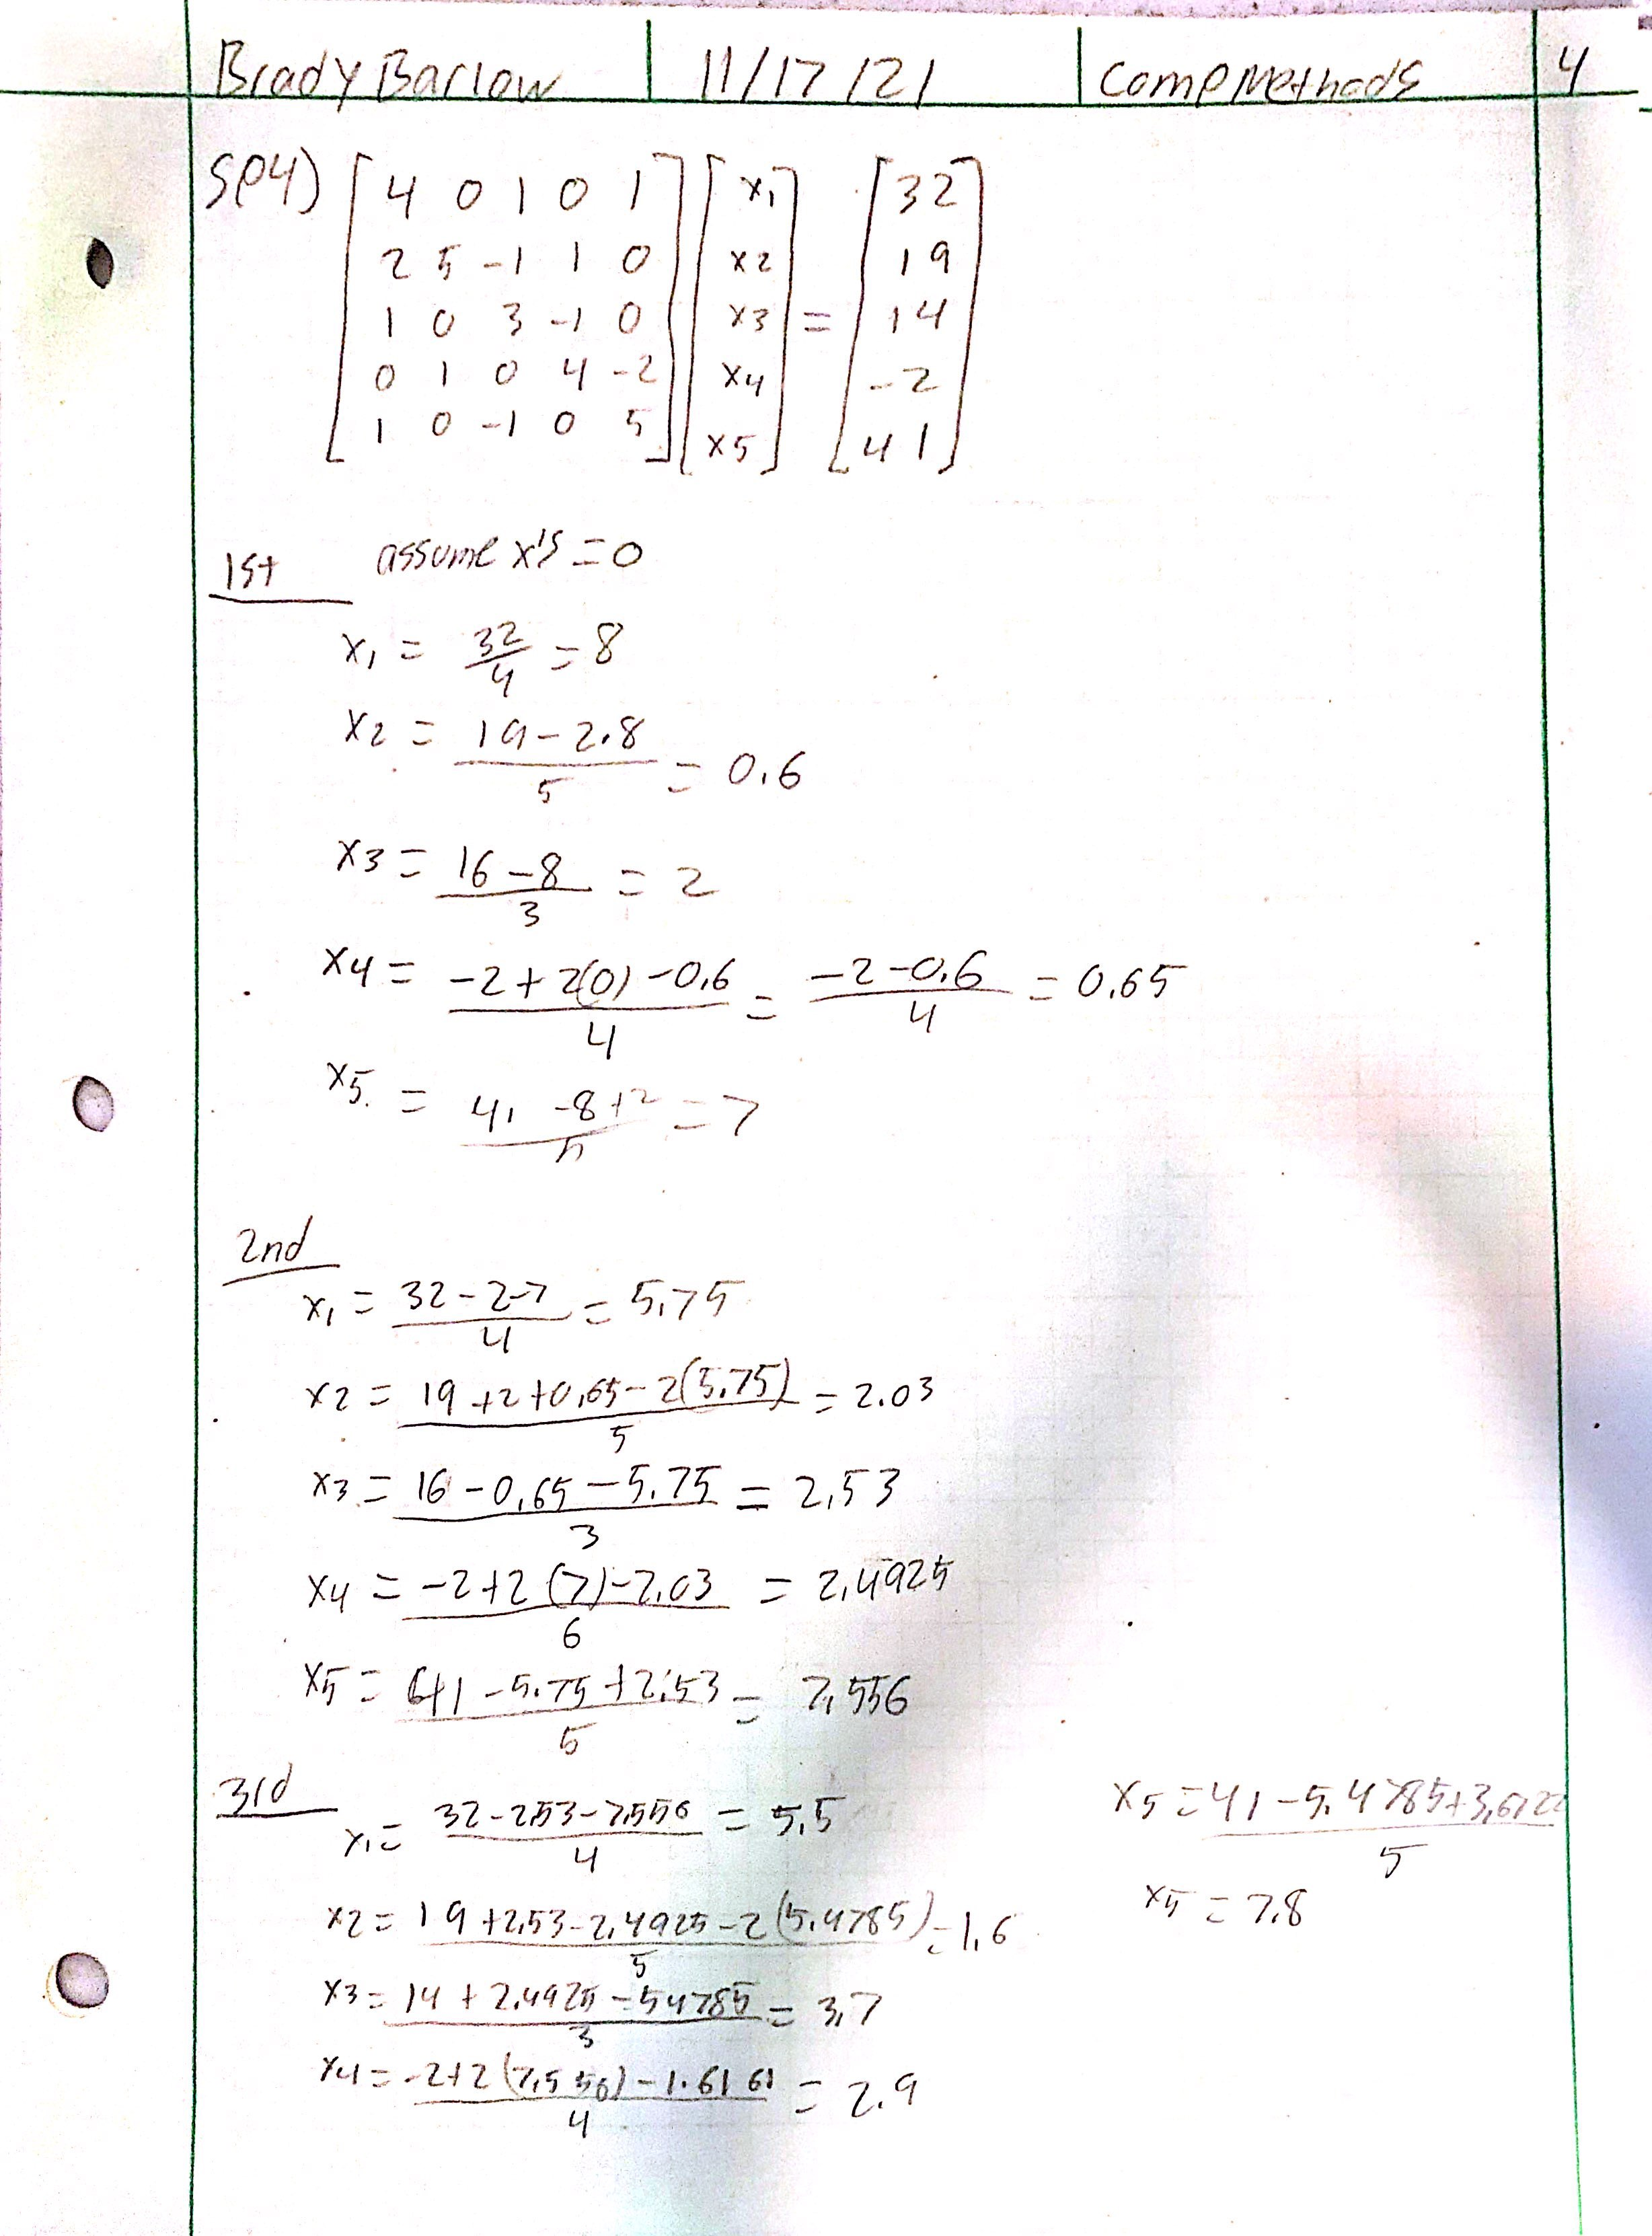

### SP7. Modify your program from the previous homework for Gauss Elimination (which includes forward elimination and back substitution) to also use partial pivoting. Use this program to solve problem SP2 from the last HW.

In [1]:
import numpy as np


def Gauss(A, B):
    n = len(B)
    for i in range(0, n):
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            B[j] = B[j] - factor * B[i]
            for k in range(i, n):
                if A[j, k] != 0.0:
                    A[j, k] = A[j, k] - factor * A[i, k]
    for k in range(n - 1, -1, -1):
        B[k] = (B[k] - np.dot(A[k, k + 1:n], B[k + 1:n])) / A[k, k]
    return print(B)

A = np.array([[2, 1, -1, 2], [1, -2, 1, -4], [3, -1, -2, -1], [-1, 2, 1, -2]], dtype=float)
B = np.array([0, 3, -3, 13], dtype=float)
print("Answer for SP2")
Gauss(A, B)

Answer for SP2
[ 1.  4.  2. -2.]


### SP8. Write a program to perform Gauss-Siedel iterative method. Use the program to solve problem SP4.

In [2]:
from math import *
import numpy as np
import copy


def get_sum(a, x_k, x_kplus1, i):
    summ = 0
    n = len(a)
    for j in range(0, n):
        if j < i:
            summ += a[i, j] * x_kplus1[j]
        elif j > i:
            summ += a[i, j] * x_k[j]
    return summ


def max_rel_err(x_kplus1, x_k):
    max = 0
    for i in range(0, len(x_k)):
        rel_err = abs((x_kplus1[i] - x_k[i]) / x_k[i])
        if rel_err > max:
            max = rel_err
    return max


def main():
    a = np.array([[4., 0., 1., 0., 1.], [2., 5., -1., 1., 0.], [1., 0., 3., -1., 0.], [0., 1., 0., 4., -2.],
                  [1., 0., -1., 0., 5.]])
    b = np.array([[32.], [19.], [14.], [-2.], [41.]])
    n = len(a)
    x_k = np.zeros(n)
    x_new = np.zeros(n)
    max_iter = 3
    err_stop = 1e-9
    rel_err = 1.1 * err_stop
    for count in range(1, max_iter + 1):
        for i in range(0, n):
            x_new[i] = (b[i] - get_sum(a, x_k, x_new, i)) / a[i, i]
        if count > 1:
            tmp = max_rel_err(x_new, x_k)
            if tmp < err_stop:
                break
        x_k = copy.deepcopy(x_new)
    return (print(np.round(x_new, decimals=3)))


if __name__ == '__main__':
    main()


[5.478 1.617 3.672 2.874 7.839]


### SP9. Modify your program that did Gauss-Jordan elimination so that it can be used to find the inverse of a matrix. Use it to solve SP3.

In [3]:
import numpy as np

n = 3
a = np.zeros((n, n * 2))
b = np.array([[-1, 2, 2], [0, 2, -0.5], [0.5, 1, -2]], dtype=float)
c = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        a[i][j] = b[i][j]
for i in range(n):
    for j in range(n):
        if i == j:
            a[i, j + n] = 1
for i in range(n):
    for j in range(n):
        if i != j:
            ratio = a[j, i] / a[i, i]
            for k in range(2 * n):
                a[j, k] = a[j, k] - ratio * a[i, k]
for i in range(n):
    div = a[i, i]
    for j in range(2 * n):
        a[i, j] = a[i, j] / div
for i in range(n):
    for j in range(n, 2 * n):
        c[i - 3, j - 3] = a[i, j]
print(f"Matrix of SP3:\n{b}\nInverse Matrix:\n{c}")

Matrix of SP3:
[[-1.   2.   2. ]
 [ 0.   2.  -0.5]
 [ 0.5  1.  -2. ]]
Inverse Matrix:
[[-3.5   6.   -5.  ]
 [-0.25  1.   -0.5 ]
 [-1.    2.   -2.  ]]
